### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Preprocessing

In [4]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [5]:
df.shape

(303, 11)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### EDA

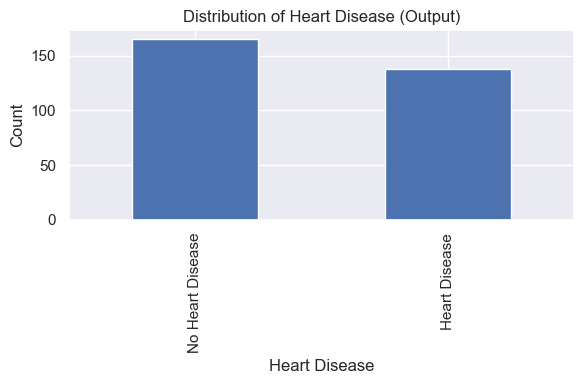

In [8]:
plt.figure(figsize=(6, 4))
df['output'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease (Output)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

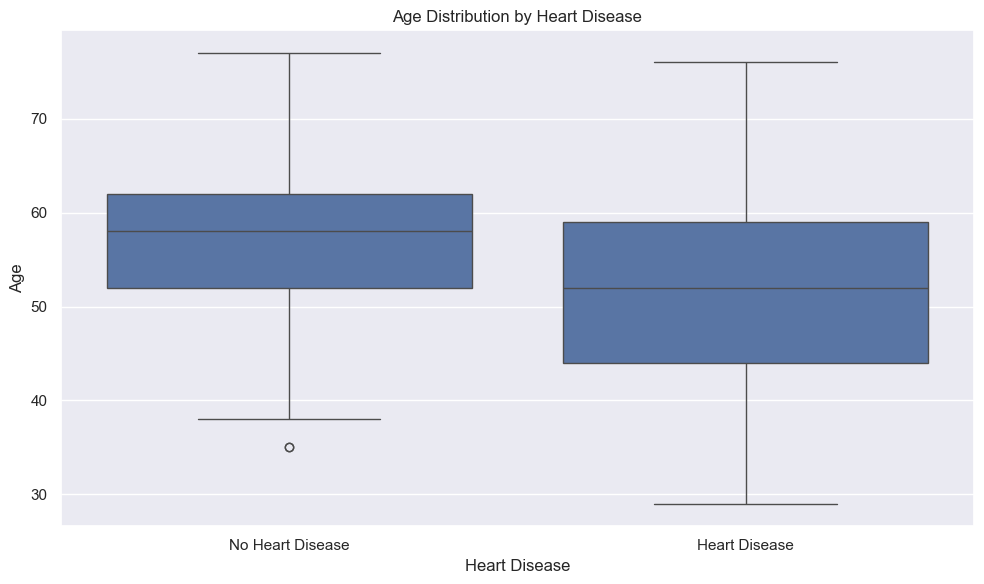

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

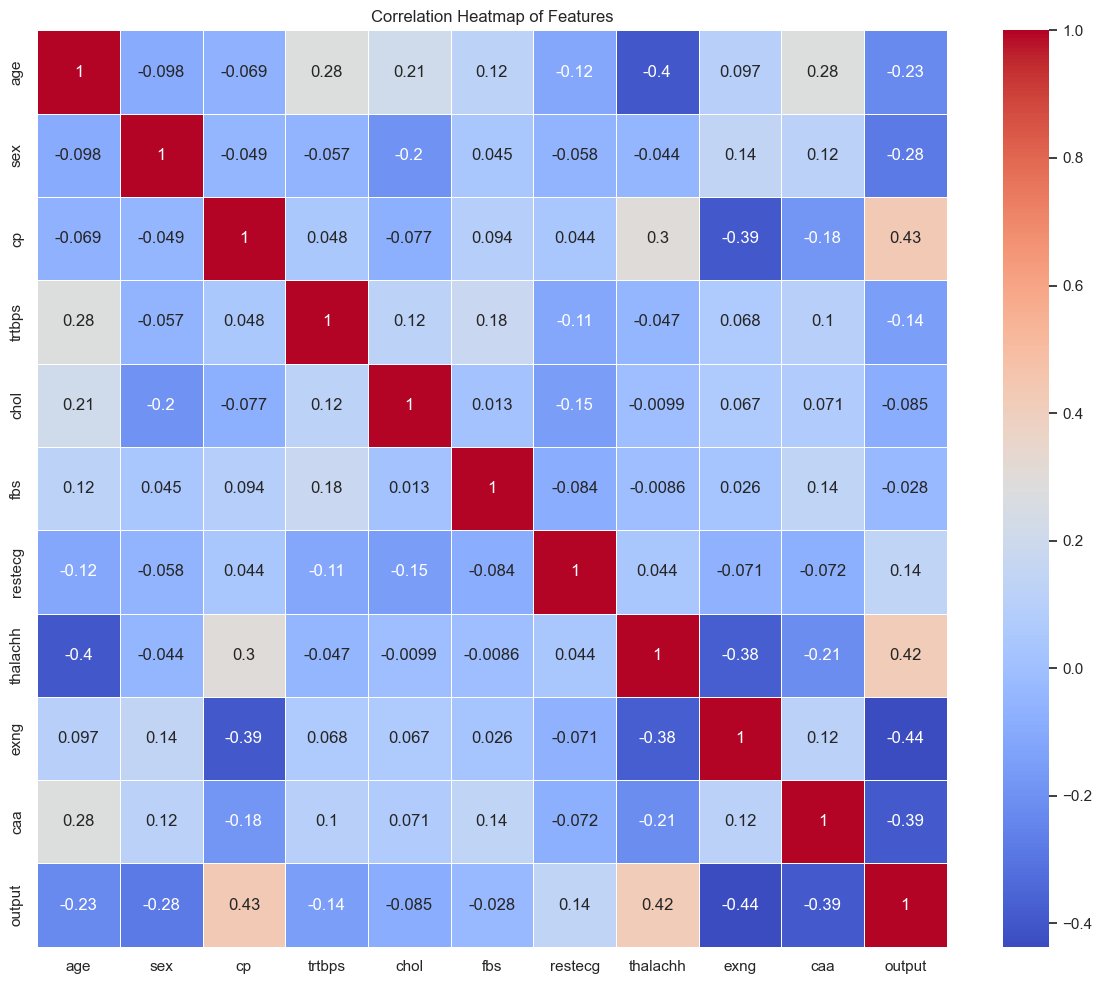

In [10]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

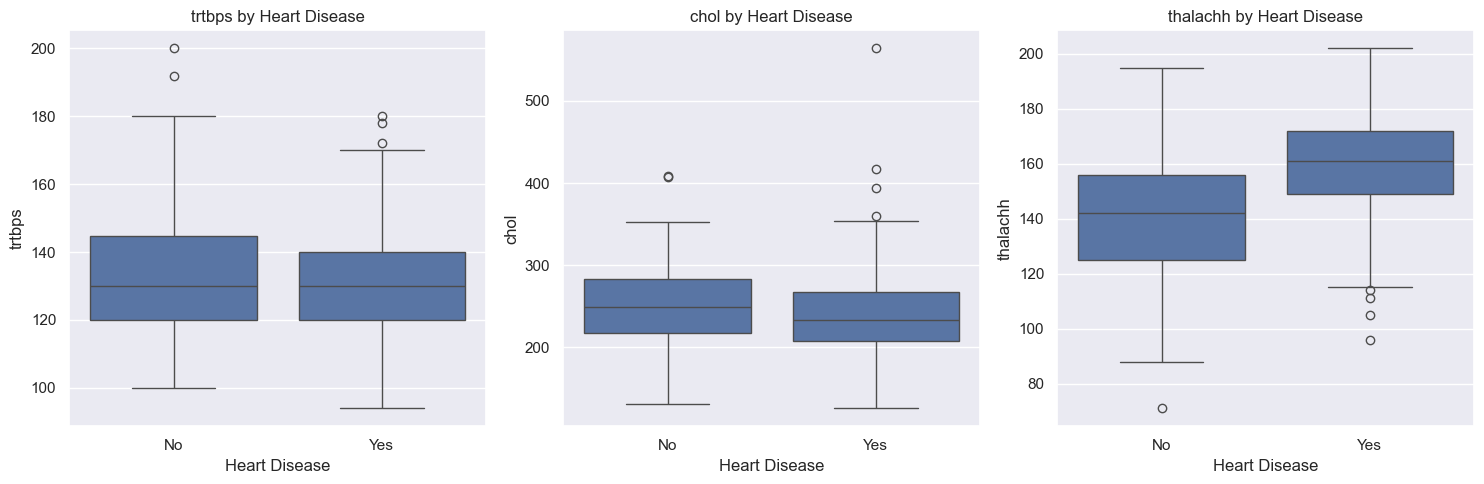

In [11]:
features_to_plot = ['trtbps', 'chol', 'thalachh']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='output', y=feature, data=df)
    plt.title(f'{feature} by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

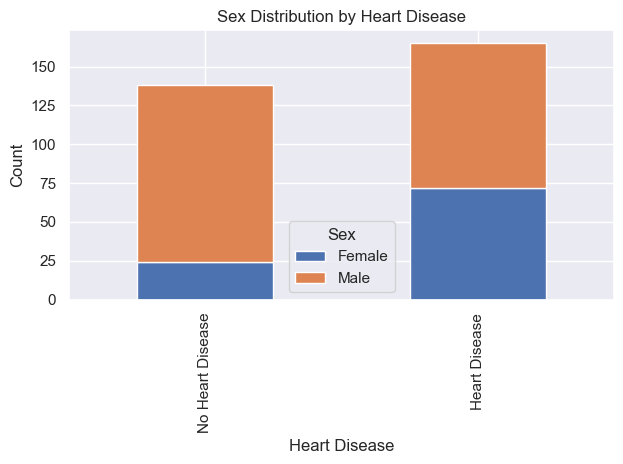

In [12]:
plt.figure(figsize=(8, 6))
df.groupby(['output', 'sex']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Sex Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

In [13]:
categorical_features = ['cp', 'fbs', 'restecg', 'exng', 'caa']
for feature in categorical_features:
    print(f"\nDistribution of {feature} by Heart Disease:")
    print(pd.crosstab(df['output'], df[feature], normalize='index'))


Distribution of cp by Heart Disease:
cp             0         1         2         3
output                                        
0       0.753623  0.065217  0.130435  0.050725
1       0.236364  0.248485  0.418182  0.096970

Distribution of fbs by Heart Disease:
fbs            0         1
output                    
0       0.840580  0.159420
1       0.860606  0.139394

Distribution of restecg by Heart Disease:
restecg         0         1         2
output                               
0        0.572464  0.405797  0.021739
1        0.412121  0.581818  0.006061

Distribution of exng by Heart Disease:
exng           0         1
output                    
0       0.449275  0.550725
1       0.860606  0.139394

Distribution of caa by Heart Disease:
caa            0         1         2         3         4
output                                                  
0       0.326087  0.318841  0.224638  0.123188  0.007246
1       0.787879  0.127273  0.042424  0.018182  0.024242


In [14]:
print("\nAdditional Insights:")
print("Mean age of patients with heart disease:", df[df['output'] == 1]['age'].mean())
print("Mean age of patients without heart disease:", df[df['output'] == 0]['age'].mean())
print("\nSex distribution:")
print(df.groupby(['output', 'sex']).size())


Additional Insights:
Mean age of patients with heart disease: 52.4969696969697
Mean age of patients without heart disease: 56.60144927536232

Sex distribution:
output  sex
0       0       24
        1      114
1       0       72
        1       93
dtype: int64


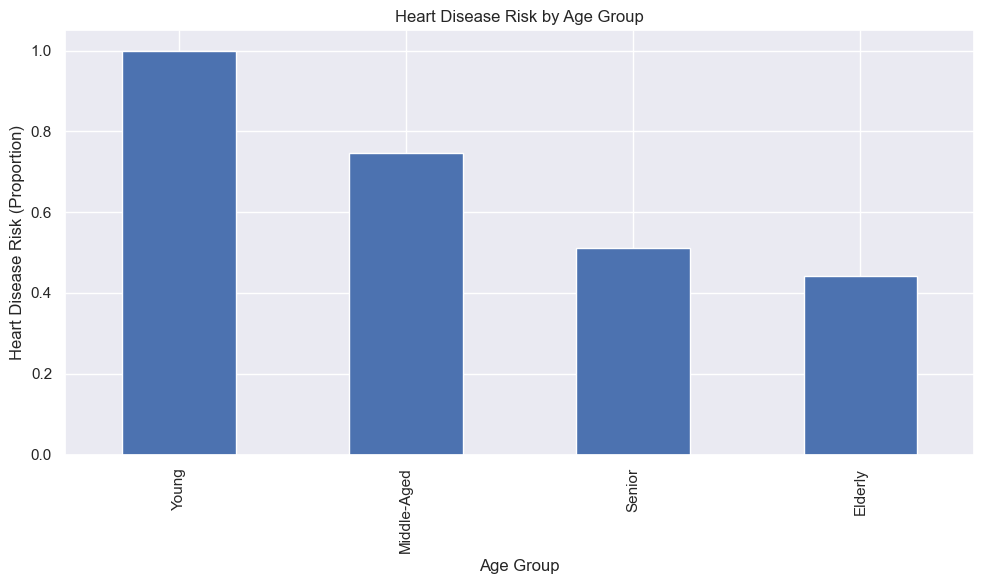

In [15]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], 
                            labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

# Analyze heart disease risk by age group
plt.figure(figsize=(10, 6))
age_group_risk = df.groupby('age_group')['output'].mean()
age_group_risk.plot(kind='bar')
plt.title('Heart Disease Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Risk (Proportion)')
plt.tight_layout()
plt.show()

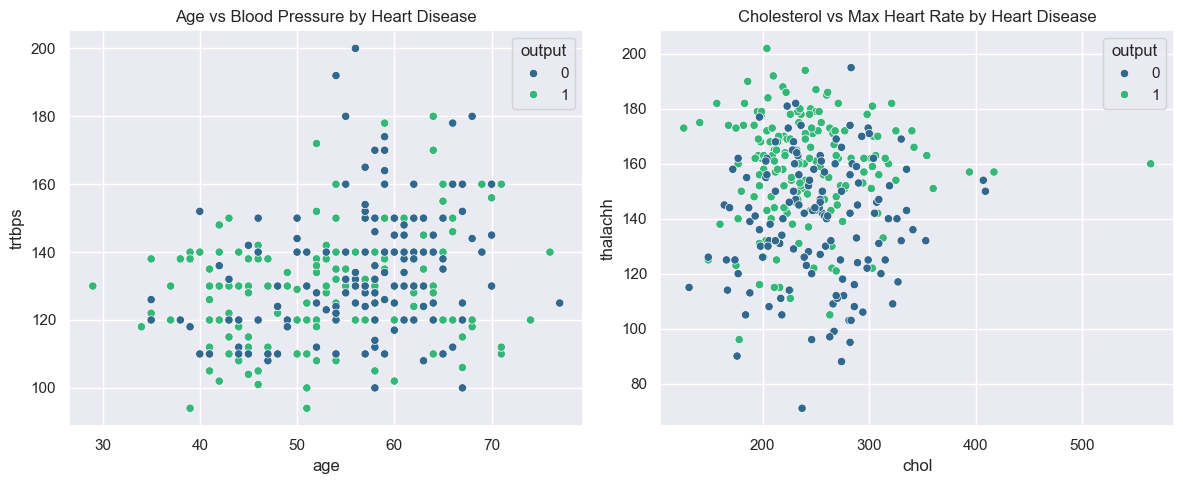

In [16]:
# Create interaction features
df['age_trtbps_interaction'] = df['age'] * df['trtbps']
df['chol_thalach_interaction'] = df['chol'] / df['thalachh']

# Visualize interaction features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='trtbps', hue='output', palette='viridis')
plt.title('Age vs Blood Pressure by Heart Disease')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='chol', y='thalachh', hue='output', palette='viridis')
plt.title('Cholesterol vs Max Heart Rate by Heart Disease')
plt.tight_layout()
plt.show()

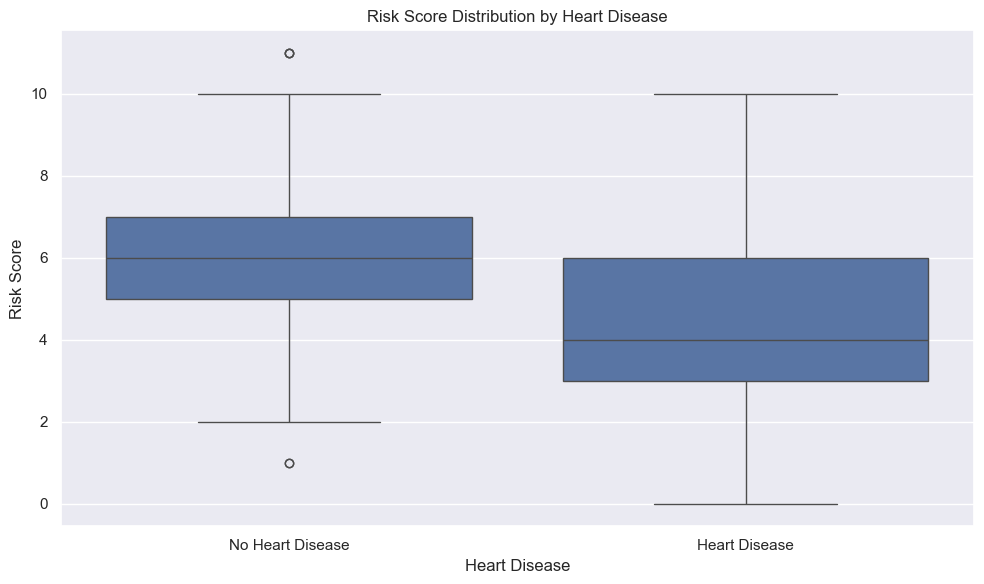

In [17]:
def calculate_risk_score(row):
    risk_score = 0
    # Age risk
    if row['age'] > 55:
        risk_score += 2
    elif row['age'] > 45:
        risk_score += 1
    
    # Sex risk (assuming 1 is male, which typically has higher risk)
    if row['sex'] == 1:
        risk_score += 1
    
    # Chest pain risk
    if row['cp'] > 1:
        risk_score += 2
    
    # Blood pressure risk
    if row['trtbps'] > 140:
        risk_score += 2
    
    # Cholesterol risk
    if row['chol'] > 240:
        risk_score += 2
    
    # Additional risk factors
    risk_score += row['exng']
    risk_score += row['caa']
    
    return risk_score

df['risk_score'] = df.apply(calculate_risk_score, axis=1)

# Visualize risk score distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='risk_score', data=df)
plt.title('Risk Score Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Risk Score')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

In [18]:
# Detailed Risk Breakdown
print("\nRisk Score Summary:")
print(df.groupby('output')['risk_score'].describe())


Risk Score Summary:
        count      mean       std  min  25%  50%  75%   max
output                                                     
0       138.0  6.130435  2.133590  1.0  5.0  6.0  7.0  11.0
1       165.0  4.381818  2.275192  0.0  3.0  4.0  6.0  10.0


In [19]:
from scipy import stats

# Categorical Feature Deep Dive
categorical_features = ['cp', 'fbs', 'restecg', 'exng', 'caa']
for feature in categorical_features:
    # Chi-square test of independence
    contingency_table = pd.crosstab(df['output'], df[feature])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"\nChi-square Test for {feature}:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("Contingency Table:")
    print(contingency_table)


Chi-square Test for cp:
Chi-square statistic: 81.6864
p-value: 0.0000
Contingency Table:
cp        0   1   2   3
output                 
0       104   9  18   7
1        39  41  69  16

Chi-square Test for fbs:
Chi-square statistic: 0.1063
p-value: 0.7444
Contingency Table:
fbs       0   1
output         
0       116  22
1       142  23

Chi-square Test for restecg:
Chi-square statistic: 10.0231
p-value: 0.0067
Contingency Table:
restecg   0   1  2
output            
0        79  56  3
1        68  96  1

Chi-square Test for exng:
Chi-square statistic: 55.9445
p-value: 0.0000
Contingency Table:
exng      0   1
output         
0        62  76
1       142  23

Chi-square Test for caa:
Chi-square statistic: 74.3666
p-value: 0.0000
Contingency Table:
caa       0   1   2   3  4
output                    
0        45  44  31  17  1
1       130  21   7   3  4


### Modelling

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report,
    roc_curve, 
    roc_auc_score
)
import joblib

In [21]:
# Separate features and target
X = df.drop('output', axis=1)
y = df['output']

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
numeric_features = ['age', 'trtbps', 'chol', 'thalachh']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

In [25]:
# KNN Pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'classifier__p': [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
}

# Support Vector Machine Pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

svm_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [26]:
# Function for evaluation metrics
def evaluate_model(y_true, y_pred, y_prob):
    """
    Comprehensive model evaluation
    """
    print("Model Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


K-Nearest Neighbors Model:
Best Parameters: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Model Evaluation Metrics:
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 Score: 0.875


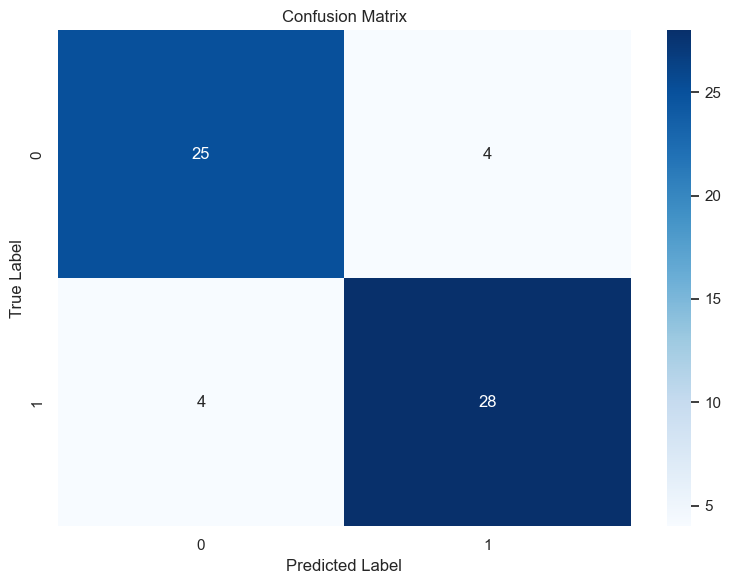

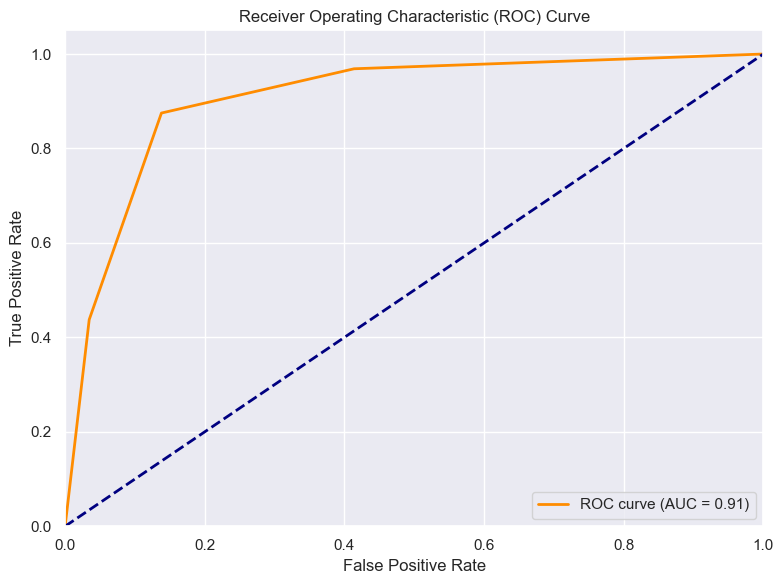


Support Vector Machine Model:
Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Model Evaluation Metrics:
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571


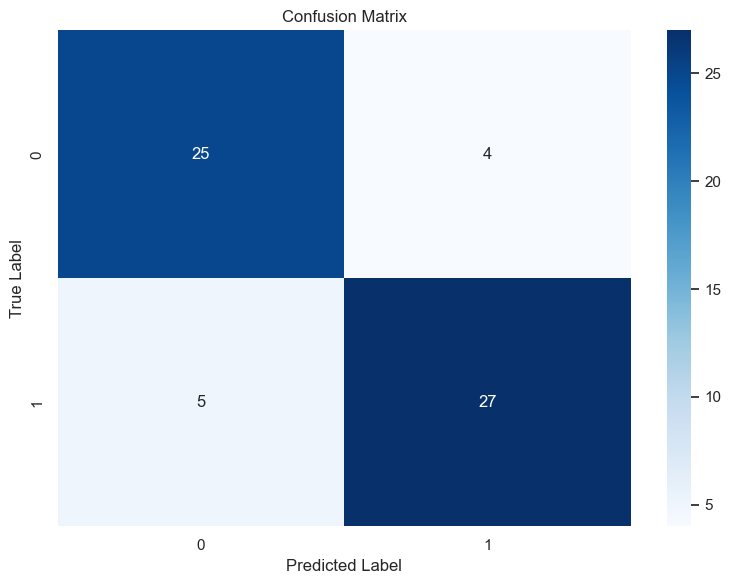

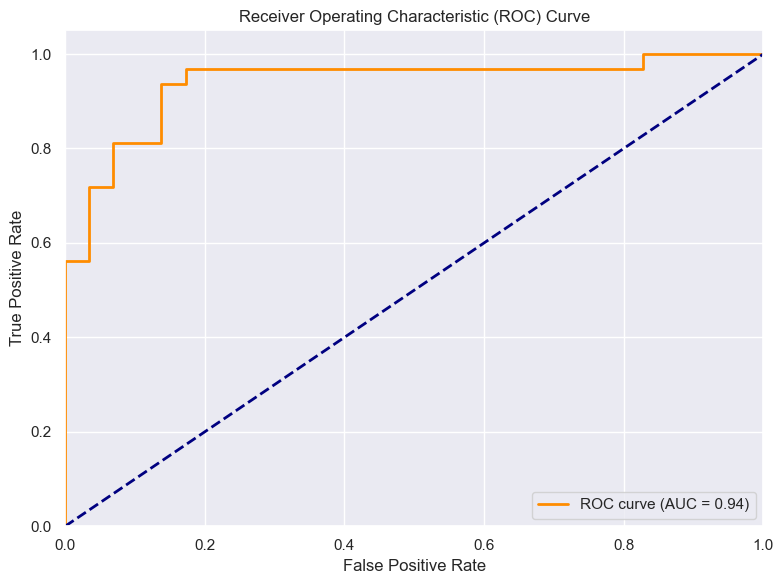


Decision Tree Model:
Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Model Evaluation Metrics:
Accuracy: 0.7540983606557377
Precision: 0.84
Recall: 0.65625
F1 Score: 0.7368421052631579


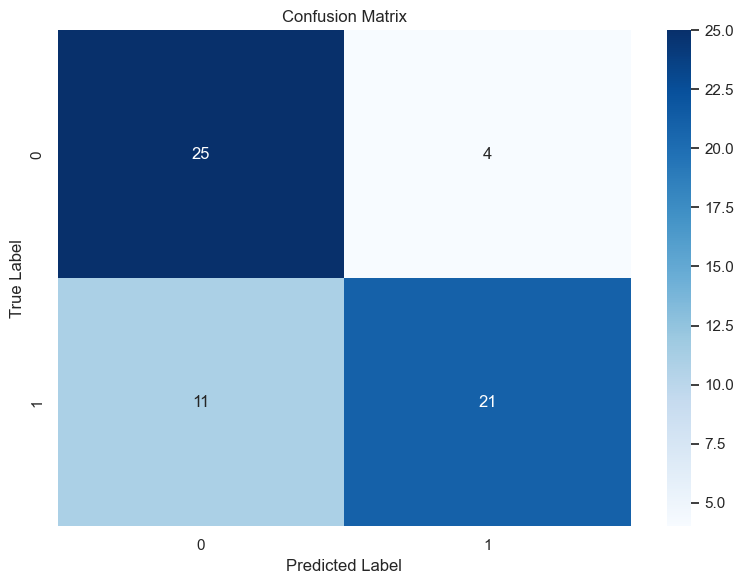

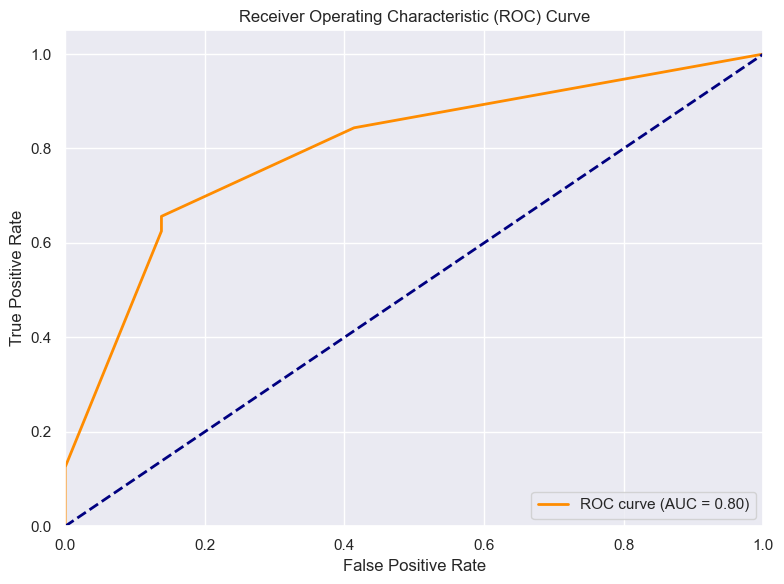

In [27]:
models = [
    ('K-Nearest Neighbors', knn_pipeline, knn_param_grid),
    ('Support Vector Machine', svm_pipeline, svm_param_grid),
    ('Decision Tree', dt_pipeline, dt_param_grid)
]

best_model = None
best_score = 0

for name, pipeline, param_grid in models:
    print(f"\n{name} Model:")
    
    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1  # Use all available cores
    )
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    current_best_model = grid_search.best_estimator_
    current_best_score = grid_search.best_score_
    
    # Predictions
    y_pred = current_best_model.predict(X_test)
    y_prob = current_best_model.predict_proba(X_test)[:, 1]
    
    # Print best parameters
    print("Best Parameters:", grid_search.best_params_)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)
    
    # Keep track of the overall best model
    if current_best_score > best_score:
        best_model = current_best_model
        best_score = current_best_score

<Figure size 1000x600 with 0 Axes>

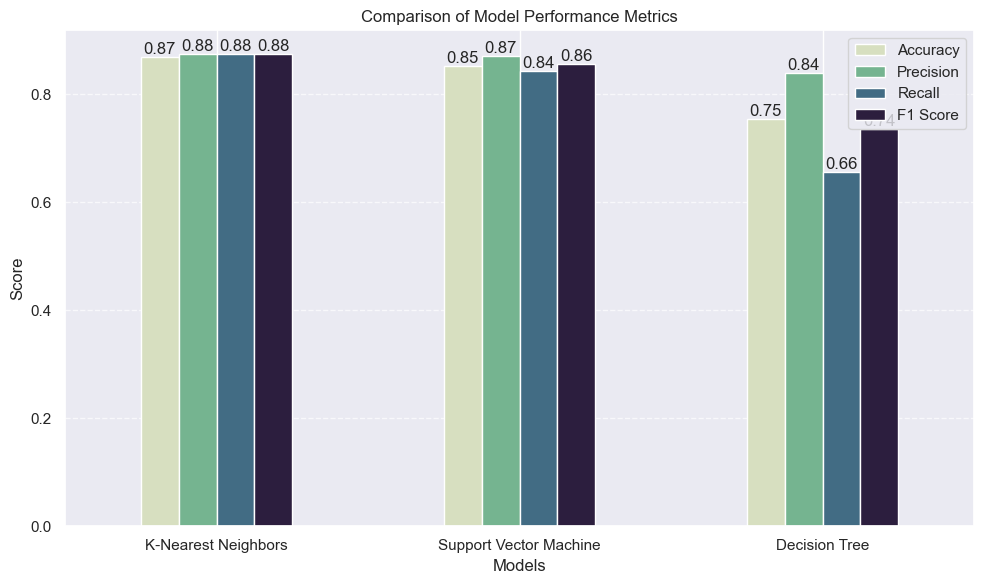

In [28]:
# Store evaluation metrics for each model
model_names = ['K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

results = []

for name, pipeline, param_grid in models:
    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)

    # Collect metrics
    results.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

results_df = pd.DataFrame(results, columns=metrics, index=model_names)

# Plotting with cubehelix theme and value labels
plt.figure(figsize=(10, 6))
colors = sns.cubehelix_palette(len(metrics), start=0.5, rot=-0.75)
ax = results_df.plot(kind='bar', figsize=(10, 6), color=colors)

# Adding value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.title("Comparison of Model Performance Metrics")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()